In [1]:
import pandas as pd  
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt  
# import seaborn as seabornInstance 
# from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from regressors import stats
# from sklearn import linear_model
# from regressors import stats
# from sklearn import metrics
%matplotlib inline

In [2]:
#pull in data from csv
housing_census_df = pd.read_csv("Output/Chicago_Housing_and_Census_Data.csv")

yelp_df = pd.read_csv("Output/Yelp_Data.csv")

crime_df = pd.read_csv("Output/Crime_Count_by_Zip.csv")

airbnb_df = pd.read_csv("Output/AirBnB_Reviews_Zipcode.csv")
airbnb_df.head()

,Zipcode,AirBnB Review Count
0,46327,2.0
1,60202,0.0
2,60302,37.0
3,60304,1.0
4,60456,2.0


In [3]:
yelp_housing_df = pd.merge(yelp_df, housing_census_df, how='inner', on='Zipcode')
yelp_crime_housing_df = pd.merge(yelp_housing_df, crime_df, how='inner', on='Zipcode')
all_data_df = pd.merge(yelp_crime_housing_df, airbnb_df, how='inner', on='Zipcode')
housing_census_df.head()

,Zipcode,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Lat,Lng
0,60601,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,1171.0,8.432347,41.883993,-87.619706
1,60602,1666.0,NaN,1277.0,31.1,115774.0,77279.0,32.0,2.505873,41.883473,-87.629127
2,60603,1630.0,NaN,1197.0,26.7,140114.0,106207.0,261.0,21.804511,41.880916,-87.625425
3,60604,1835.0,NaN,668.0,40.6,114565.0,130966.0,127.0,19.011976,41.878485,-87.627893
4,60605,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,2312.0,8.828471,41.870331,-87.623574


In [4]:
all_data_df['Nightlife per 1000 People'] = (all_data_df['Total Nightlife']/ all_data_df['Population'])*1000
all_data_df['Entertainment per 1000 People'] = ((all_data_df['Total Nightlife']+all_data_df['Total Restaurant'])/ all_data_df['Population'])*1000
all_data_df['Restaurants per 1000 People'] = (all_data_df['Total Restaurant']/ all_data_df['Population'])*1000
all_data_df['Grocery per 1000 People'] = (all_data_df['Total Grocery']/ all_data_df['Population'])*1000
all_data_df['Crime per 1000 People']=(all_data_df['Crime Count']/all_data_df['Population'])*1000
all_data_df['Total Entertainment'] = ((all_data_df['Total Nightlife']+all_data_df['Total Restaurant']))
all_data_df['Total Amenity'] = ((all_data_df['Total Nightlife']+all_data_df['Total Restaurant']+all_data_df['Total Grocery']))
all_data_df.head()


,Zipcode,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,...,Lng,Crime Count,AirBnB Review Count,Nightlife per 1000 People,Entertainment per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People,Total Entertainment,Total Amenity
0,60601,48,150,7,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,...,-87.619706,1087,11.0,3.456470,14.257939,10.801469,0.504069,78.274645,198,205
1,60602,11,78,0,1666.0,NaN,1277.0,31.1,115774.0,77279.0,...,-87.629127,8086,19.0,8.613939,69.694597,61.080658,0.000000,6332.028191,89,89
2,60603,22,96,1,1630.0,NaN,1197.0,26.7,140114.0,106207.0,...,-87.625425,2086,10.0,18.379282,98.579783,80.200501,0.835422,1742.690058,118,119
3,60604,5,41,0,1835.0,NaN,668.0,40.6,114565.0,130966.0,...,-87.627893,1062,22.0,7.485030,68.862275,61.377246,0.000000,1589.820359,46,46
4,60605,34,112,7,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,...,-87.623574,2387,20.0,1.298305,5.575073,4.276768,0.267298,91.148618,146,153


In [5]:
len(all_data_df)

57

In [6]:
#add a downtown dummy variable to signify if the zipcode is downtown.  These zips have different relationships to the
#independent variables
all_data_df["Downtown"] = " "
for index, row in all_data_df.iterrows():
    if row['Zipcode']==60602:
        all_data_df.loc[index, 'Downtown'] = 1
    elif row['Zipcode']==60603:
        all_data_df.loc[index, 'Downtown']= 1
    elif row['Zipcode']==60604:
        all_data_df.loc[index, 'Downtown']=1
    elif row['Zipcode']==60606:
        all_data_df.loc[index, 'Downtown']=1
    else:
        all_data_df.loc[index, 'Downtown']=0
all_data_df.head()

,Zipcode,Total Nightlife,Total Restaurant,Total Grocery,Median Rent,Median Home Value,Population,Median Age,Household Income,Per Capita Income,...,Crime Count,AirBnB Review Count,Nightlife per 1000 People,Entertainment per 1000 People,Restaurants per 1000 People,Grocery per 1000 People,Crime per 1000 People,Total Entertainment,Total Amenity,Downtown
0,60601,48,150,7,1944.0,391000.0,13887.0,37.6,110215.0,95152.0,...,1087,11.0,3.456470,14.257939,10.801469,0.504069,78.274645,198,205,0
1,60602,11,78,0,1666.0,NaN,1277.0,31.1,115774.0,77279.0,...,8086,19.0,8.613939,69.694597,61.080658,0.000000,6332.028191,89,89,1
2,60603,22,96,1,1630.0,NaN,1197.0,26.7,140114.0,106207.0,...,2086,10.0,18.379282,98.579783,80.200501,0.835422,1742.690058,118,119,1
3,60604,5,41,0,1835.0,NaN,668.0,40.6,114565.0,130966.0,...,1062,22.0,7.485030,68.862275,61.377246,0.000000,1589.820359,46,46,1
4,60605,34,112,7,1865.0,284200.0,26188.0,33.6,107811.0,81144.0,...,2387,20.0,1.298305,5.575073,4.276768,0.267298,91.148618,146,153,0


In [7]:
#x = all_data_df[["Household Income", "AirBnB Review Count", "Entertainment per 1000 People", 
            #     ]].values
#first gives better p values second gives better r2
x = all_data_df[[ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Amenity", "Crime Count", "Downtown"]].values
#x = all_data_df[[ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Entertainment", "Total Grocery", "Crime Count", "Downtown"]].values
y = all_data_df['Median Rent'].values

In [8]:
regressor = LinearRegression()
regressor.fit(x, y)

#get r squared
xlabels = [ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Amenity", "Crime Count", "Downtown"]
#xlabels = [ "Household Income", "Poverty Count",  "AirBnB Review Count", "Total Entertainment", "Total Grocery", "Crime Count", "Downtown"]


stats.summary(regressor, x, y, xlabels)

Residuals:
     Min       1Q  Median        3Q       Max
-339.402 -93.1369 -4.1578  107.6494  264.9737


Coefficients:
                        Estimate  Std. Error  t value   p value
_intercept           1331.018215  117.351241  11.3422  0.000000
Household Income        0.004537    0.000272  16.6557  0.000000
Poverty Count          -0.006184    0.002412  -2.5633  0.013081
AirBnB Review Count     4.792012    1.410438   3.3975  0.001258
Total Amenity           0.448446    0.202600   2.2135  0.030957
Crime Count            -0.012017    0.006994  -1.7182  0.091280
Downtown             -253.087132  108.148500  -2.3402  0.022863
---
R-squared:  0.68721,    Adjusted R-squared:  0.64967
F-statistic: 18.31 on 6 features


In [9]:
y_pred = regressor.predict(x)

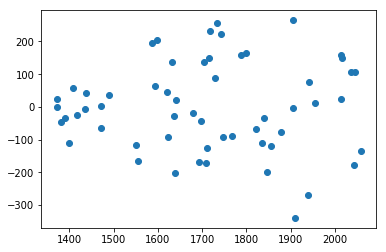

In [10]:
zipcode =all_data_df['Zipcode'].tolist()
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df_residual = df
df_residual['residual']=df_residual['Predicted']-df_residual['Actual']
plt.scatter(df_residual['Predicted'],df_residual['residual'])
plt.show()
df_subset = df.head(15)

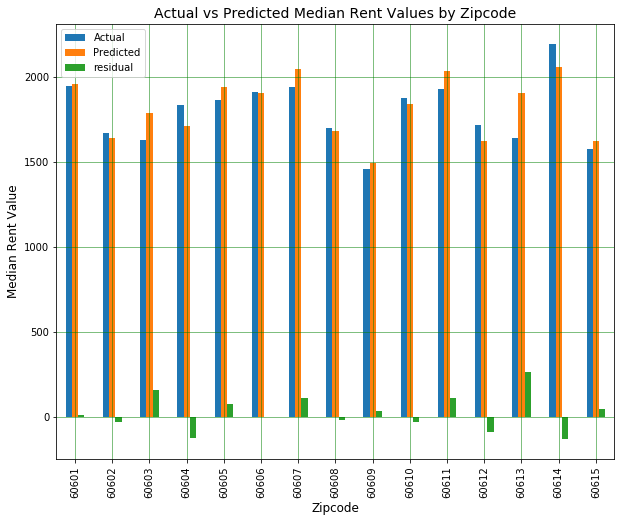

In [11]:
df_subset.plot(kind='bar',figsize=(10,8))
tick_locations = [value for value in range(0,len(df_subset))]
plt.xticks(tick_locations, zipcode)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs Predicted Median Rent Values by Zipcode", fontsize=14)
plt.ylabel("Median Rent Value", fontsize=12)
plt.xlabel("Zipcode", fontsize=12)
#plt.savefig("Images/Actual_vs_Predicted_Median_Rent.png", bbox_inches="tight")
plt.show()

In [12]:
#correlation_data = all_data_df[["Median Rent", "Household Income", "Poverty Count", "AirBnB Review Count", "Nightlife per 1000 People", 
          #              "Restaurants per 1000 People", "Grocery per 1000 People", "Crime per 1000 People" ]]
correlation_data = all_data_df[["Median Rent", "Household Income", "Poverty Count", "AirBnB Review Count", "Total Nightlife", 
                        "Total Restaurant", "Total Grocery", "Total Entertainment", "Crime per 1000 People", "Total Amenity","Crime Count", "Population","Downtown" ]]
correlation_data.head()

,Median Rent,Household Income,Poverty Count,AirBnB Review Count,Total Nightlife,Total Restaurant,Total Grocery,Total Entertainment,Crime per 1000 People,Total Amenity,Crime Count,Population,Downtown
0,1944.0,110215.0,1171.0,11.0,48,150,7,198,78.274645,205,1087,13887.0,0
1,1666.0,115774.0,32.0,19.0,11,78,0,89,6332.028191,89,8086,1277.0,1
2,1630.0,140114.0,261.0,10.0,22,96,1,118,1742.690058,119,2086,1197.0,1
3,1835.0,114565.0,127.0,22.0,5,41,0,46,1589.820359,46,1062,668.0,1
4,1865.0,107811.0,2312.0,20.0,34,112,7,146,91.148618,153,2387,26188.0,0


In [13]:
correlation_data.corr(method ='pearson') 

,Median Rent,Household Income,Poverty Count,AirBnB Review Count,Total Nightlife,Total Restaurant,Total Grocery,Total Entertainment,Crime per 1000 People,Total Amenity,Crime Count,Population,Downtown
Median Rent,1.000000,0.661071,-0.563718,0.142537,0.605822,0.509172,0.182558,0.559246,-0.043200,0.550937,-0.522145,-0.156142,0.056170
Household Income,0.661071,1.000000,-0.777840,-0.217836,0.459147,0.404535,-0.185462,0.436466,0.353043,0.407352,-0.553283,-0.522197,0.584655
Poverty Count,-0.563718,-0.777840,1.000000,0.318253,-0.259522,-0.068408,0.375314,-0.138210,-0.248947,-0.107145,0.644119,0.760353,-0.367260
AirBnB Review Count,0.142537,-0.217836,0.318253,1.000000,0.161494,0.155386,0.320528,0.162386,-0.210502,0.178433,0.286577,0.436110,-0.282192
Total Nightlife,0.605822,0.459147,-0.259522,0.161494,1.000000,0.868124,0.407408,0.941845,-0.125045,0.934749,-0.209384,0.149741,-0.127353
Total Restaurant,0.509172,0.404535,-0.068408,0.155386,0.868124,1.000000,0.549693,0.984434,-0.117308,0.985565,-0.210693,0.295344,-0.062030
Total Grocery,0.182558,-0.185462,0.375314,0.320528,0.407408,0.549693,1.000000,0.516424,-0.283941,0.566122,-0.020102,0.654307,-0.326935
Total Entertainment,0.559246,0.436466,-0.138210,0.162386,0.941845,0.984434,0.516424,1.000000,-0.123699,0.998253,-0.216788,0.252982,-0.087091
Crime per 1000 People,-0.043200,0.353043,-0.248947,-0.210502,-0.125045,-0.117308,-0.283941,-0.123699,1.000000,-0.138668,0.141285,-0.372613,0.718663
Total Amenity,0.550937,0.407352,-0.107145,0.178433,0.934749,0.985565,0.566122,0.998253,-0.138668,1.000000,-0.210072,0.288674,-0.106395
